# QLearning tutorial

In QLearning we build table which stores future reward for each states and actions.
In this notebook we will implement Learning Agen using Q Learning function with Q Table for storing rewards.

For this tutorial we will use [Frozen Lake](https://gym.openai.com/envs/FrozenLake-v0).

```
SFFF       (S: starting point, safe)
FHFH       (F: frozen surface, safe)
FFFH       (H: hole, fall to your doom)
HFFG       (G: goal, where the frisbee is located)
```

This is a stochastic environment, because wind can change the state we will end up.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym

## Helper functions

In [81]:
# FrozenLake is solved if moving average over window size 100 is >= 0.78
def moving_average(a, n=100):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

## Load environment

In [2]:
env = gym.make('FrozenLake-v0')

[2017-06-06 15:22:19,950] Making new env: FrozenLake-v0


## Explore environment

In [4]:
print('Number of actions: {}'.format(env.action_space.n))
print('Number of states: {}'.format(env.observation_space.n))

Number of actions: 4
Number of states: 16


## Q Table Agent

This agent uses [Bellman equation](https://en.wikipedia.org/wiki/Bellman_equation) to improve Q Table

$$Q(s,a) = r + γ (max_a(Q(s', a'))$$

The update step uses the formula:

$$Q(s,a) = Q(s,a) + alpha * (r + γ (max_a(Q(s', a')) - Q(s,a))$$

In [76]:
class TableAgent:
    
    def __init__(self, num_states, num_actions, gamma, learning_rate):
        self.qtable = np.zeros([num_states, num_actions])
        self.greedy_threshold = 0.9
        self.gamma = gamma
        self.alpha = learning_rate
    
    
    def choose_action(self, state, step):
        """ Choose best action (exploit) with the probability **greedy_threshold**
            Otherwise choose random action.
            The threshold is bigger for later episodes
        """
        if np.random.rand() < self.greedy_threshold * (step/1000.):
            return np.argmax(self.qtable[state,:])
        else:
            return np.random.choice(range(4))
    
    
    def learn(self, state, action, reward, next_state):
        """Update state using Bellman equation"""
        r2 = reward + self.gamma * np.max(self.qtable[next_state,:])
        self.qtable[state, action] += self.alpha * (r2-self.qtable[state, action])

## Lets implement Q-Table Learning

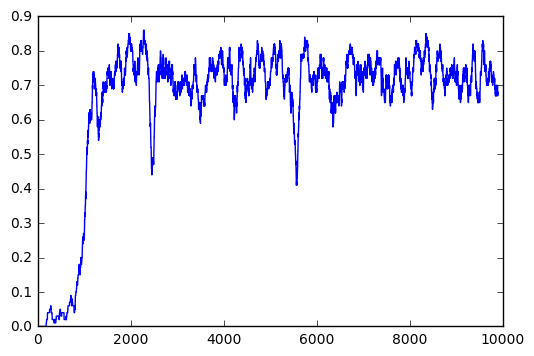

[[  5.82176323e-02   1.07657759e-02   1.21007681e-02   1.21505629e-02]
 [  6.69494402e-03   4.05190198e-03   1.48584325e-03   7.80068646e-02]
 [  5.55765594e-03   6.14152153e-03   5.51446797e-03   1.29013666e-01]
 [  1.48994279e-03   1.18585163e-03   3.96345166e-03   7.45059073e-02]
 [  2.75372453e-01   3.62127619e-03   1.09026793e-02   3.92201221e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  7.84407948e-06   8.07231855e-06   1.96132583e-01   2.66619904e-08]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  3.01982423e-03   4.10346189e-03   3.70657861e-03   2.02555730e-01]
 [  3.87753055e-03   4.73204626e-01   3.38991918e-03   4.63392849e-03]
 [  8.01940860e-01   3.58199265e-04   8.09862441e-04   9.27030344e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.28330387e-02   1.01900115e-02   5.09297360e-01   1.65414669e-02]
 [  9.

In [82]:
# Learning parameters
learning_rate = 0.8
gamma = 0.95
num_episodes = 10000

# Agent
agent = TableAgent(env.observation_space.n, env.action_space.n, gamma, learning_rate)

# Learn Q-Table
rewards = []
for episode in range(num_episodes):
    s = env.reset()
    total_reward = 0
    for j in range(100):
        a = agent.choose_action(s, episode)
        s2, reward, done, _ = env.step(a)
        agent.learn(s, a, reward, s2)
        s = s2
        total_reward += reward
        if done:
            break
    rewards.append(total_reward)

plt.plot(moving_average(rewards))
plt.show()
print(agent.qtable)